In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gravhydro as gh

## Data

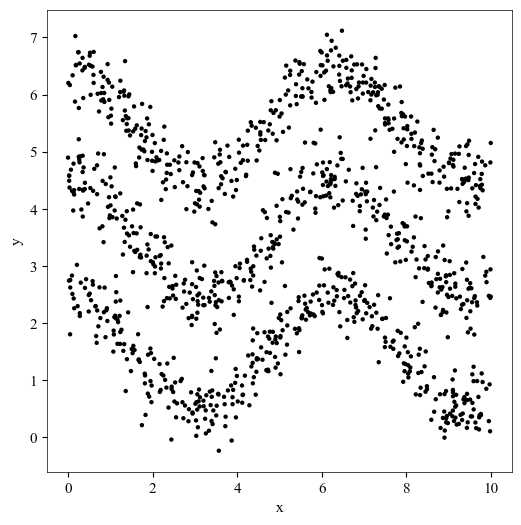

In [2]:
# Positions
dy = 1.0
lim = 1.0
lim0 = 1.0
y = np.array([])
npts = 400
nsteps = 3
total_N = npts * nsteps
for i in range(nsteps):
    new_y = np.random.normal(lim + dy/2, dy/3, npts)# np.random.uniform(lim, lim + dr, 200)
    lim += dy*2
    y = np.append(y, new_y)
x_ls = np.random.uniform(0, 10, total_N)
y_ls = y + np.cos(x_ls)
pos = np.array([x_ls, y_ls]).T

# Masses
masses = np.ones(pos.shape[0])*10


# Plot
plt.figure(figsize=(6, 6))
plt.scatter(pos[:, 0], pos[:, 1], s=masses)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Acceleration due to pressure

In [3]:
# set constants

h = 0.5
cs = 1.0
rho0 = np.mean(gh.densities(pos, masses, h))

In [4]:
acc = gh.pressureAcc(pos, masses, h, rho0, cs)

TypeError: pressure() got multiple values for argument 'gamma'

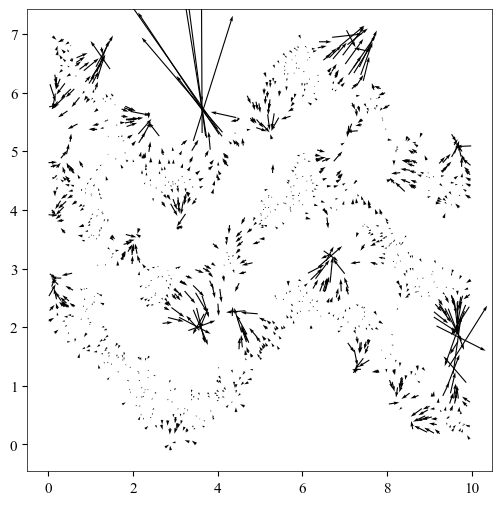

In [ ]:
plt.figure(figsize=(6,6))
plt.quiver(*pos.T, *acc.T)
plt.savefig('coolplot1.png', dpi=300)

In [ ]:
h = 0.5
cs = 1

rhos = gh.densities(pos, masses, h)
rho0 = np.mean(rhos)
pressures = gh.pressure(rhos, rho0, cs)

Text(0, 0.5, 'y')

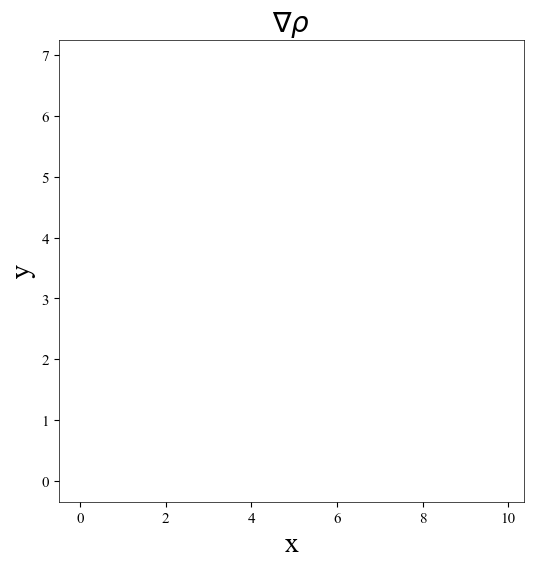

In [ ]:
grid_sz = 80
density_grid = np.zeros((grid_sz, grid_sz))
density_grad_grid = np.zeros((int(grid_sz/2), int(grid_sz/2), pos.shape[-1]))
og_pt =  np.zeros((int(grid_sz/2), int(grid_sz/2), pos.shape[-1]))
xgrid = np.linspace(0, 10, grid_sz)
ygrid = np.linspace(0, 7, grid_sz)
for i, x in enumerate(xgrid):
    for j, y in enumerate(ygrid):
        density_grid[i, j] = gh.density_i(np.array([x, y]), pos, masses, h)
        if i % 2 == 0 and j % 2 == 0:
            og_pt[int(i/2), int(j/2)] = np.array([x, y])
            #density_grad_grid[int(i/2), int(j/2)] = gh.acceleration_i(np.array([x, y]), pos, masses, rhos, pressures, h=0.5)
plt.figure(figsize=(6,6))
#plt.imshow(density_grid.T, extent=(xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()), origin='lower', aspect='auto', cmap='inferno')
plt.quiver(*og_pt.T, *density_grad_grid.T, angles='xy', scale= 200, color='w')
plt.title('$\\nabla \\rho$', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

In [ ]:
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

In [ ]:
xygrid = np.array([Xgrid.flatten(), Ygrid.flatten()]).T

In [ ]:
inside_terms = gh.acc_inside_terms(pressures, rhos)

In [ ]:
from tqdm import tqdm

In [ ]:
acc_grid = np.zeros_like(xygrid)
for i, xy in enumerate(tqdm(xygrid)):
    acc_grid[i] = gh.acceleration_i(xy, pos, masses, rhos, inside_terms)

100%|██████████| 6400/6400 [00:00<00:00, 12059.11it/s]


In [ ]:
gh.acceleration_i(xy, pos, masses, rhos, inside_terms)

array([-0., -0.])

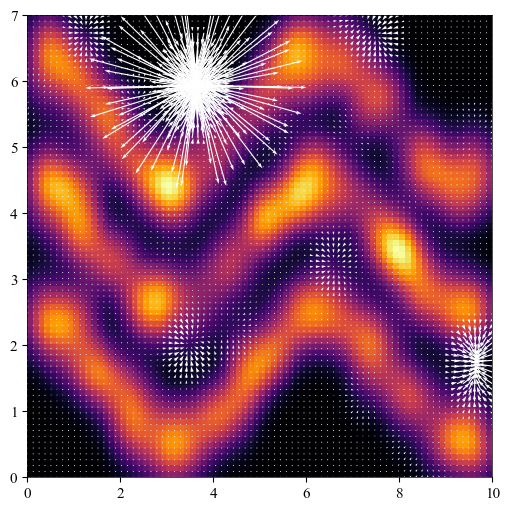

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(density_grid.T, extent=(xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()), origin='lower', aspect='auto', cmap='inferno')
plt.quiver(*xygrid.T, *acc_grid.T, color='w')
plt.savefig('coolplot2.png', dpi=300)

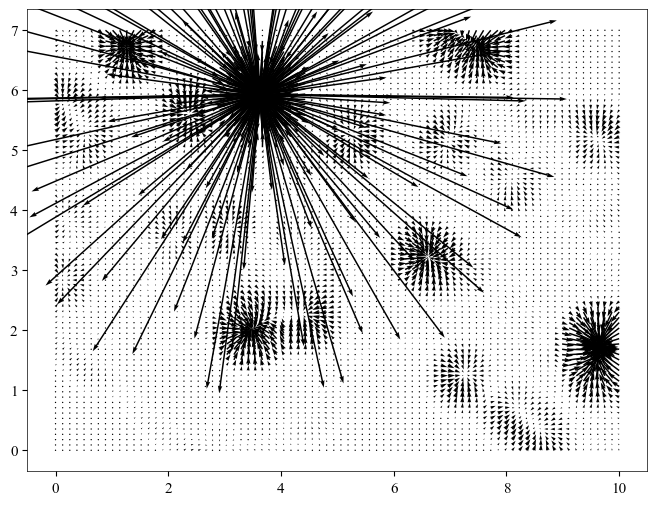

In [ ]:
plt.quiver(*xygrid.T, *acc_grid.T, color='k', scale=1000)
plt.savefig('coolplot3.png', dpi=300)